## **Exploratory Data Analysis**

### *We are given a dataset SampleSuperstore and we need to perform EDA on it to answer two questions:*

    As a buisness manager, what are the weak areas where you can work to make more profit?

    What all buisness problems you can derive by exploring the data ?

Let us try and find the answer to these questions.

Importing required libraries.

In [1]:
#importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
#"%matplotlib inline" sets the backend of matplotlib to the 'inline' backend

import seaborn as sns
import warnings as wg
wg.filterwarnings('ignore')

First, let's read the dataset and understand it.

In [2]:
#Reading the dataset
superstore = pd.read_csv("SampleSuperstore.csv")
print("Data imported successfully!!")

Data imported successfully!!


In [3]:
superstore.head(10) #shows first 10 rows of the dataset.

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
1,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
2,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
5,First Class,Consumer,United States,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912
6,First Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
7,Second Class,Consumer,United States,Concord,North Carolina,28027,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
8,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
9,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784


In [4]:
superstore.shape #getting the dimensionality of the dataset

(9994, 13)

This means that our dataset consists of 9994 instances and 13 columns.

In [5]:
superstore.describe() #generating descriptive statistics of the dataset like mean, min and max values.

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Checking for null values.

In [6]:
superstore.isnull().sum() #checking for null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Thus, dataset has no null values. That's a relief! 

In [7]:
superstore.info() #getting the overall information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Checking for Duplicate values!

In [8]:
superstore.duplicated().sum() #detects duplicate values

17

The dataset has 17 duplicate values!

In [9]:
superstore.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
1,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
2,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
9990,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
9991,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9992,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808


We dropped all the duplicates values. Thus, dataset has reduced to 9977 instances(rows) and 13 columns.

In [10]:
superstore.isna().sum() #detects missing values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing values! Woahhhhh!

In [11]:
#Name of columns
superstore.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Finding the unique values in the dataset.

In [12]:
for i in superstore.columns:
    print(f'{i}:{superstore[i].nunique()}')

Ship Mode:4
Segment:3
Country:1
City:531
State:49
Postal Code:631
Region:4
Category:3
Sub-Category:17
Sales:5825
Quantity:14
Discount:12
Profit:7287


<AxesSubplot:>

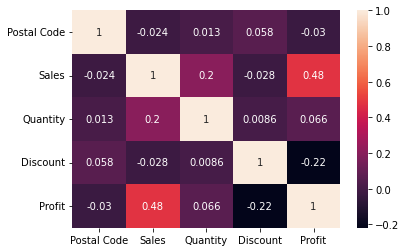

In [13]:
sns.heatmap(superstore.corr(),annot=True) #Correlation is a measure that expresses the extent to which two variables are linearly related. 

**Observation:** 
    
    A column is highly correlated with itself.
    Sales and Profit have positive correlation. High sale will result in higher profit. 

### *Let's understand the dataset with the help of graphs:*

**Starting the observation with the first column "Ship Mode"**

How does Shipping Mode affect Sales and Profit?

In [14]:
superstore['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

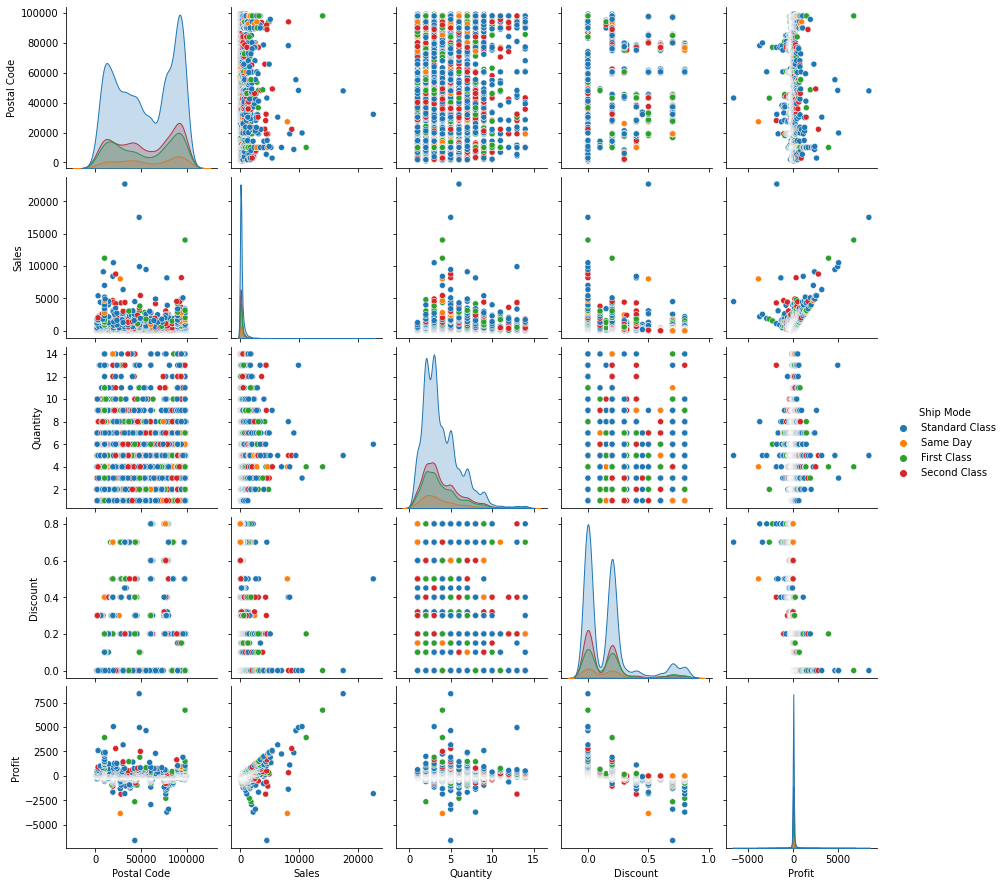

In [15]:
sns.pairplot(superstore,hue='Ship Mode')

<Figure size 720x1152 with 0 Axes>

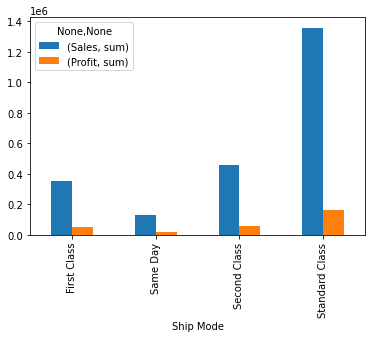

In [17]:
plt.figure(figsize=(10,16))
superstore.groupby('Ship Mode')['Sales','Profit'].agg(['sum']).plot.bar()
plt.show()

**Observation:**

    Maximum sales takes place in Standard Class.
    Maximum profit is observed in Standard Class. 

Then lets analyze the Segment column with other columns:

In [18]:
superstore['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

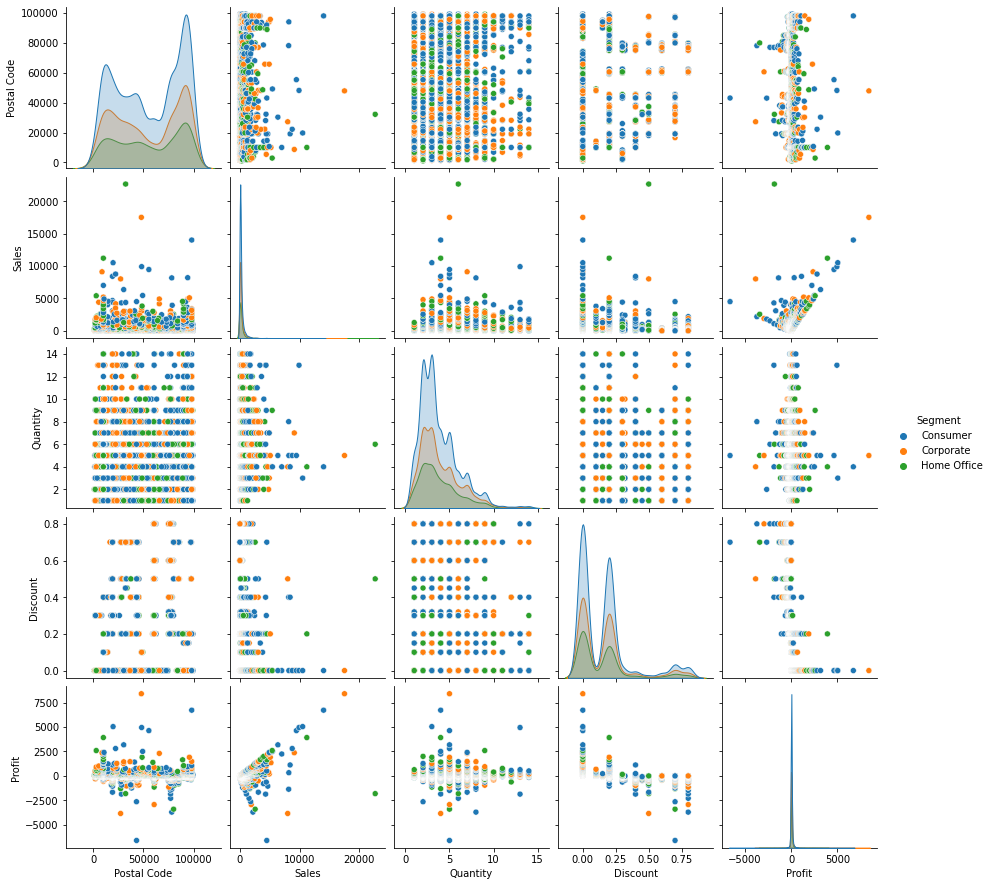

In [19]:
sns.pairplot(superstore,hue='Segment') #pairplot gives pairwise relation in a dataset

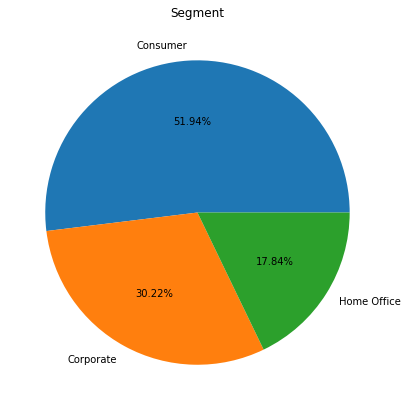

In [21]:
plt.figure(figsize=(7,7))
plt.title('Segment')
plt.pie(x=superstore['Segment'].value_counts(),labels=superstore['Segment'].value_counts().index,autopct='%.2f%%')
#Another way to draw pie chart:
#superstore['Ship Mode'].value_counts().plot.pie(autopct='%.2f%%') #autopct enables you to display the percent value using Python string formatting
plt.show()

**Obervation:**

    More than 50% of data is consisting of Consumer Segment. Evidently so, more sales takes place in that Segment. 

Let's make it clear by plotting a bar graph. 

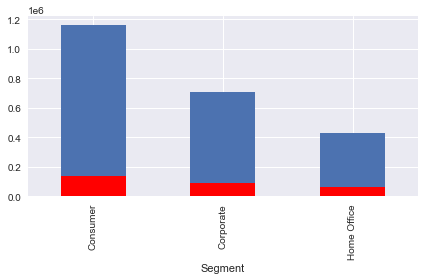

In [22]:
seg_s=superstore.groupby('Segment').Sales.sum().nlargest(75)

seg_p=superstore.groupby('Segment').Profit.sum().nlargest(75)

plt.style.use('seaborn')
plt.figure(figsize=(6,4))
seg_s.plot(kind='bar')
seg_p.plot(kind='bar',color='red')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

    High margin of Sale is observed in the Consumer Segment.

Now, its time for observation in City column.

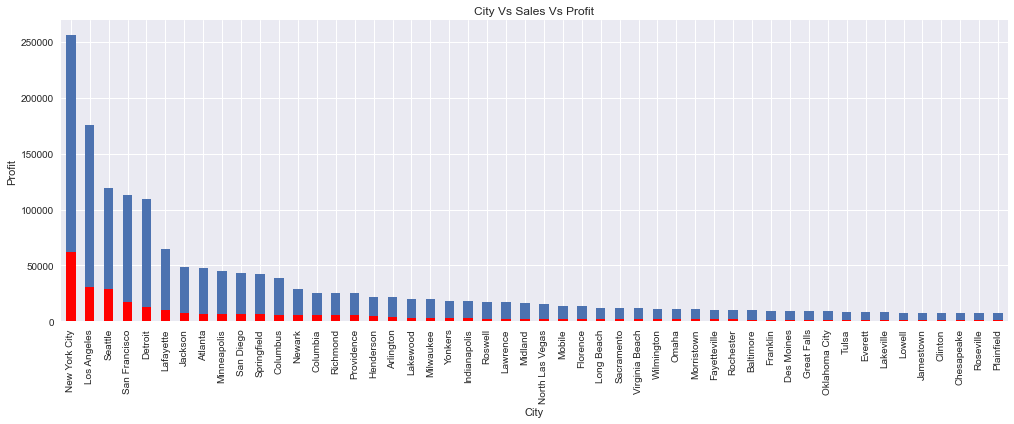

In [23]:
city_s=superstore.groupby('City').Sales.sum().nlargest(50)

city_p=superstore.groupby('City').Profit.sum().nlargest(50)

plt.style.use('seaborn')
plt.figure(figsize=(14,6))
plt.title('City Vs Sales Vs Profit')
city_s.plot(kind='bar')
city_p.plot(kind='bar',color='red')
plt.xticks(rotation=90)
plt.tight_layout()
plt.ylabel('Profit')
plt.show()

**Observation:**

    New York City has been observed to have more sales and make more profit. Numerically, its more than 250000. 
    Then, Los Angeles stands second in making profit. The difference of numbers between the two cities are higher, around 100000. 

<AxesSubplot:xlabel='City'>

<Figure size 576x396 with 0 Axes>

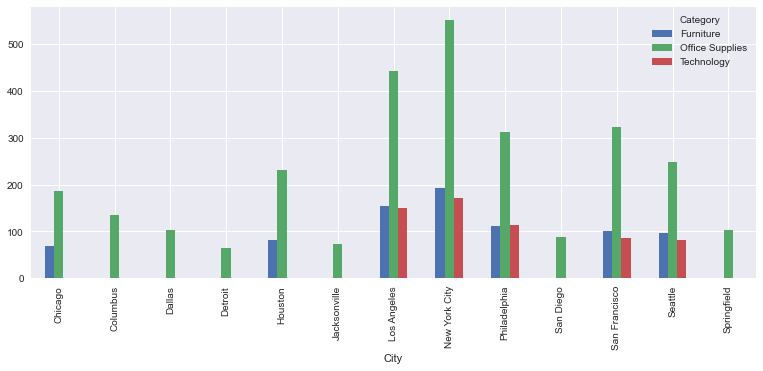

In [16]:
city_ccs=superstore.groupby(['City','Category']).size().nlargest(25)

plt.style.use('seaborn')
plt.tight_layout()
city_ccs=city_ccs.unstack()
city_ccs.plot(kind='bar',figsize=(13,5))


    Overall, Office Supplies has most sales in the overall list of Cities. Then comes the Furnitures and lastly Technology.
    Observably, New York City has the maximum number of sales of office Supplies. 

<AxesSubplot:ylabel='City,Category'>

<Figure size 576x396 with 0 Axes>

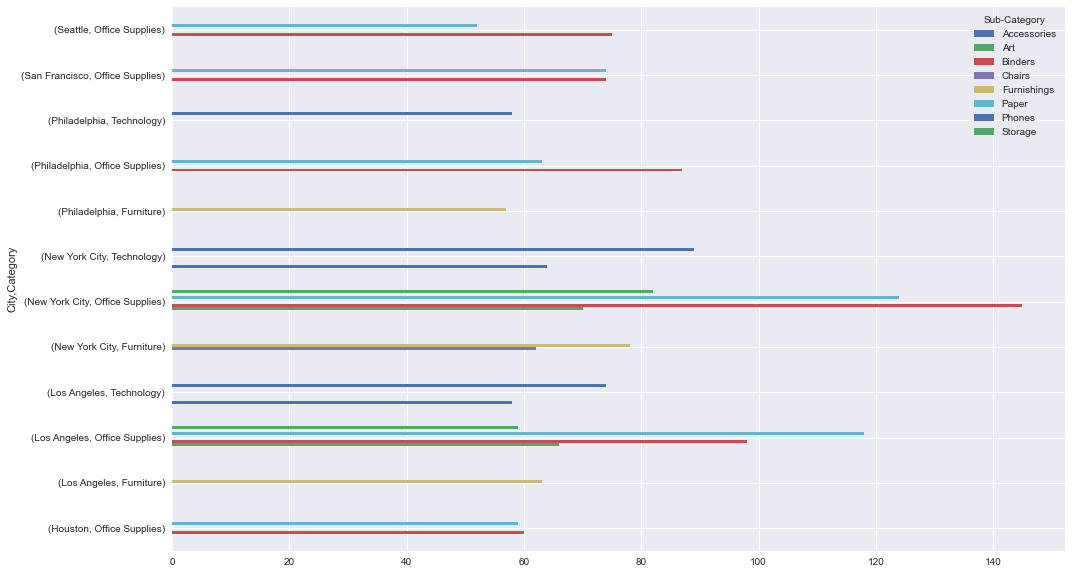

In [17]:
ccs=superstore.groupby(['City','Category','Sub-Category']).size().nlargest(25)

plt.style.use('seaborn')
plt.tight_layout()
ccs=ccs.unstack()
ccs.plot(kind='barh',figsize=(16,10))

    New York City and Los Angeles has maximum number of Office supplies sales that includes Binders, Papers, Storage and Art. 
    The sell of Furnitures is not good in Los Angeles and Philadelphia.

<AxesSubplot:title={'center':'Category & Sub-Category'}, ylabel=' '>

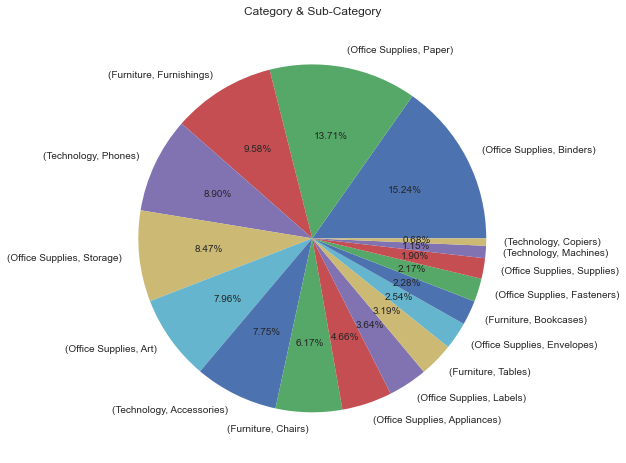

In [18]:
cs=superstore.groupby(['Category','Sub-Category']).size().nlargest(25)

plt.style.use('seaborn')
plt.title('Category & Sub-Category')
cs.plot(kind='pie',figsize=(16,8),autopct='%.2f%%',ylabel=' ')

    In the overall dataset, Office supplies takes more than 50% of the data(13.71% + 15.24% + 8.47% + 7.96% + 3.64% + 2.54% + 2.17% + 1.90% = 55.43%). The above graph shows sale of every category with its sub-category.

For the column Category, let's oberserve the profit:

In [19]:
superstore['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

<Figure size 720x1152 with 0 Axes>

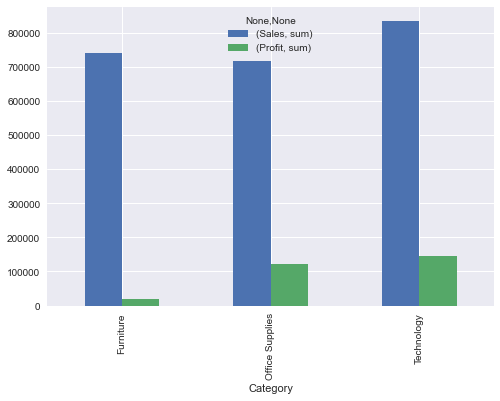

In [20]:
plt.figure(figsize=(10,16))
superstore.groupby('Category')['Sales','Profit'].agg(['sum']).plot.bar()
plt.show()

    The highest sale and profit is observed in the Technology category.

States profit and Sales observation:

In [21]:
state_s=superstore.groupby('State').Sales.sum().nlargest(75)

state_p=superstore.groupby('State').Profit.sum().nlargest(75)


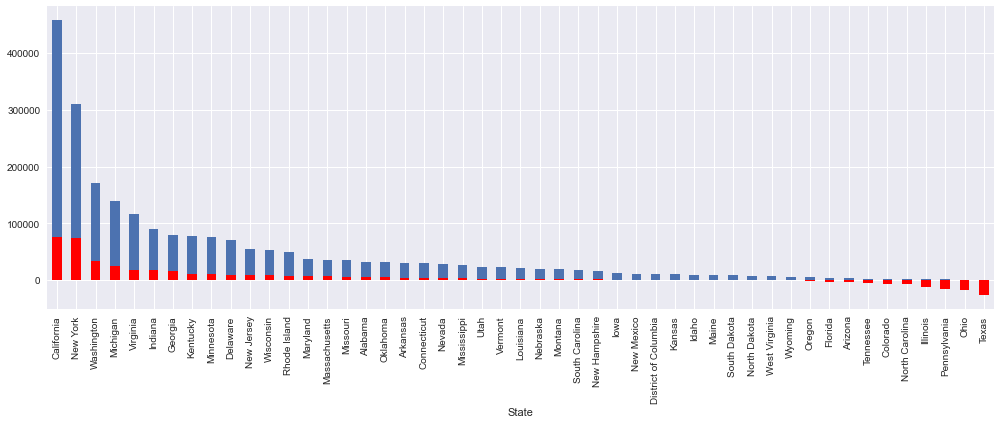

In [22]:
plt.style.use('seaborn')
plt.figure(figsize=(14,6))
state_s.plot(kind='bar')
state_p.plot(kind='bar',color='red')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

    Highest profit and sales is observed in California. 
    Cities like North California, Illinois, Pennsylvania, ohio and Texas suffer heavy loss. 

<AxesSubplot:ylabel='State,Region'>

<Figure size 576x396 with 0 Axes>

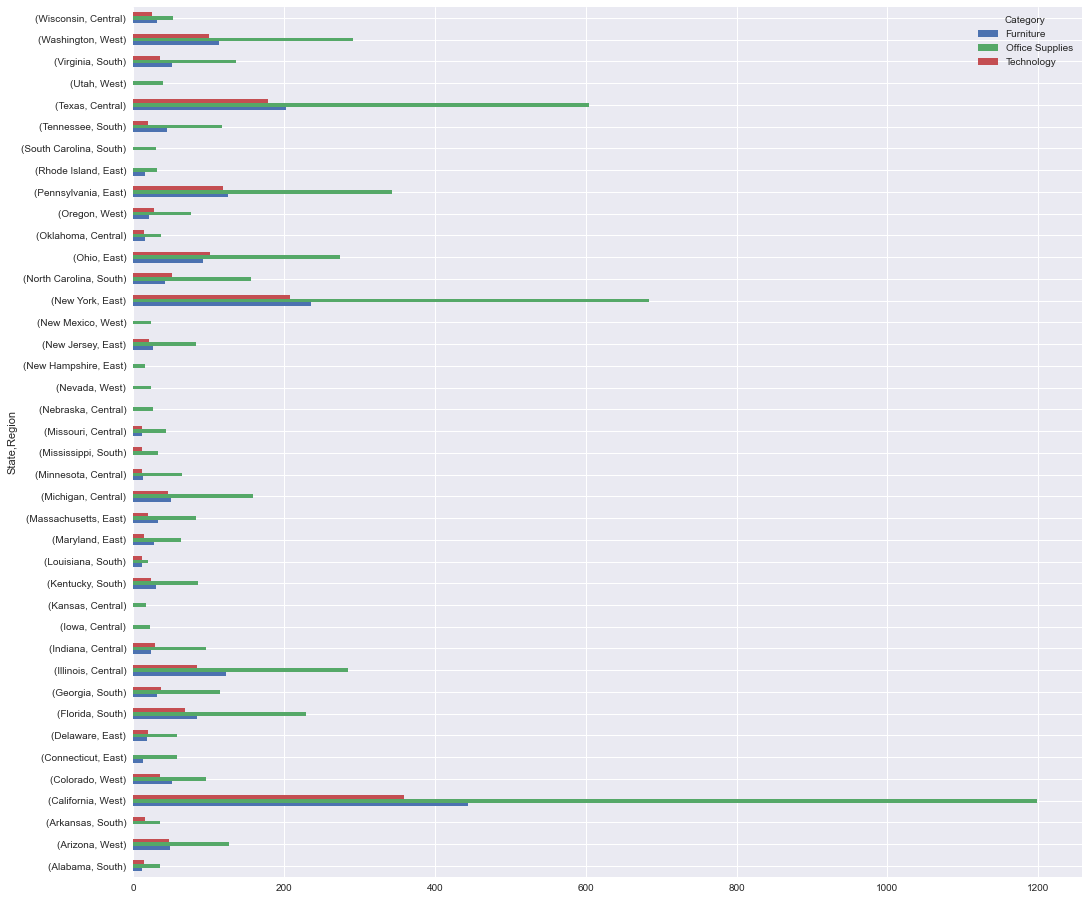

In [24]:
src=superstore.groupby(['State','Region','Category']).size().sort_values(ascending=True).nlargest(100)

plt.style.use('seaborn')
plt.tight_layout()
src=src.unstack()
src.plot(kind='barh',figsize=(17,16))

    The Western Region of California observes the maximum sell of office supplies 

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

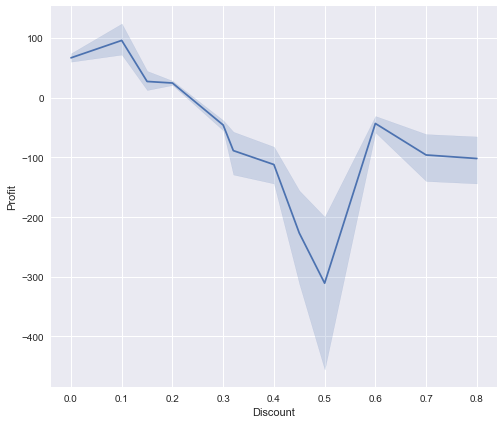

In [25]:
plt.figure(figsize=(8,7))
sns.lineplot(superstore['Discount'],superstore['Profit'],data=superstore)

     The profit is maximum when the discount is 0.1.
     The profit is minimum when the discount is 0.5. There is a slight rise in the profit at 0.6 then again it falls down to -100. 

This concludes our Exploratory Data Analysis of the given dataset. 